# Workshop Exo2 - Airbnb listings in Paris 🏡 I1G1 Faty MBAYE

---

<img src="https://www.infoservice-client.com/wp-content/uploads/2016/08/airbnb-slogan.png" />

Let's go deeper in our understanding of data visualizations and in our skills at manipulating real life data.

In this challenge, we will explore **Airbnb data from Paris listings**. The objective is to answer the following question:

> **How does location impact listing price?**

The data, that you will collect from [InsideAirbnb](http://insideairbnb.com/get-the-data.html) is a very complete dataset of Airbnb listings.

Feel free to play around, and to draw visualizations in order to better understand the data.


---

**Q1**. 🇫🇷 Download and load data of **Airbnb Paris listings** from http://insideairbnb.com/.

> 🔦 **Hint**: For extracting a `.gz` file using command line, run:
>
> `gunzip archive.gz`

- How many lines and columns does it contain?
- As it contains many columns, some do not appear with `head` method. Print the names of the different columns.

In [60]:
# TODO - Download and load dataset listings.csv
import pandas as pd 

listing_data=pd.read_csv('listings.csv',sep=',')
listing_data.head(5)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3109,https://www.airbnb.com/rooms/3109,20240906025355,2024-09-11,city scrape,zen and calm,Lovely Appartment with one bedroom with a Quee...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/miso/Hosting-...,3631,...,5.00,5.00,5.00,7511409139079,t,1,1,0,0,0.05
1,5396,https://www.airbnb.com/rooms/5396,20240906025355,2024-09-13,city scrape,Your perfect Paris studio on Île Saint-Louis,"NEW SOFA-BED SINCE JUNE 2023, Please disregard...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,...,4.84,4.96,4.59,7510402838018,f,1,1,0,0,2.23
2,7397,https://www.airbnb.com/rooms/7397,20240906025355,2024-09-06,city scrape,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !",NaN,https://a0.muscache.com/pictures/67928287/330b...,2626,...,4.89,4.93,4.74,7510400829623,f,1,1,0,0,2.20
3,7964,https://www.airbnb.com/rooms/7964,20240906025355,2024-09-10,previous scrape,Sunny apartment with balcony,"We are renting our a spacious, sunny fully fur...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,22155,...,5.00,5.00,5.00,7510903576564,f,1,1,0,0,0.03
4,241715,https://www.airbnb.com/rooms/241715,20240906025355,2024-09-11,city scrape,Big Cosy Appartement with 100 m2 Terrace in Paris,Come to stay in our unique Parisian flat to en...,"The 19th arrondissement of Paris, located in t...",https://a0.muscache.com/pictures/miso/Hosting-...,3342097,...,NaN,NaN,NaN,7511913070313,f,1,1,0,0,NaN


In [61]:
# TODO - Get shape, print columns
listing_data.shape
listing_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

**Q2**. Let's clean a bit this dataset:
- Does it contain only data from Paris city? If not make sure to filter only on Paris listings.
- Also, keep only listings with location as exact (`is_location_exact` column)

In [62]:
#TODO - Clean dataset
#print(listing_data["host_location"])
cleaned_listing_data=listing_data.dropna(subset=['host_location'])
cleaned_listing_data.head()
print(cleaned_listing_data["host_location"])

#D'apres ce bout de code ça ne contient que les données de Paris

0        Paris, France
1        Paris, France
2        Paris, France
3        Paris, France
4        Paris, France
             ...      
95454    Paris, France
95455    Paris, France
95457    Paris, France
95458    Paris, France
95459    Paris, France
Name: host_location, Length: 75907, dtype: object


In [63]:
#TODO - Shape of cleaned dataset
cleaned_listing_data.shape

(75907, 75)

**Q3**. Let's understand better the listings price and draw some visualization with Seaborn
- Observe price distribution with a **box plot** - Reference: https://en.wikipedia.org/wiki/Box_plot
- Do you think there are some outliers? If yes, remove them
- Finally, visualize the cleaned distribution of the listings price with a **histrogram plot**
- Comment

> 🔦 **Hint**:  You might want to clean the column before starting your analysis 🙂
>
> In order to apply a defined function `my_func` to a column (Series), you can use `apply` method:
> ``` python
>  data[column_name].apply(lambda x: my_func(x))
> ```

0        113.0
1         95.0
2        145.0
8         75.0
9        246.0
         ...  
95453    140.0
95454    114.0
95455    100.0
95458     38.0
95459     43.0
Name: price, Length: 43891, dtype: float64
les données aprés remplaçement des valeurs NaN:
 0     113.0
1      95.0
2     145.0
8      75.0
9     246.0
10     80.0
11     75.0
13     80.0
14    124.0
16    208.0
Name: price, dtype: float64
prix en dessous de 1000 
 0        113.0
1         95.0
2        145.0
8         75.0
9        246.0
         ...  
95453    140.0
95454    114.0
95455    100.0
95458     38.0
95459     43.0
Name: price, Length: 43891, dtype: float64


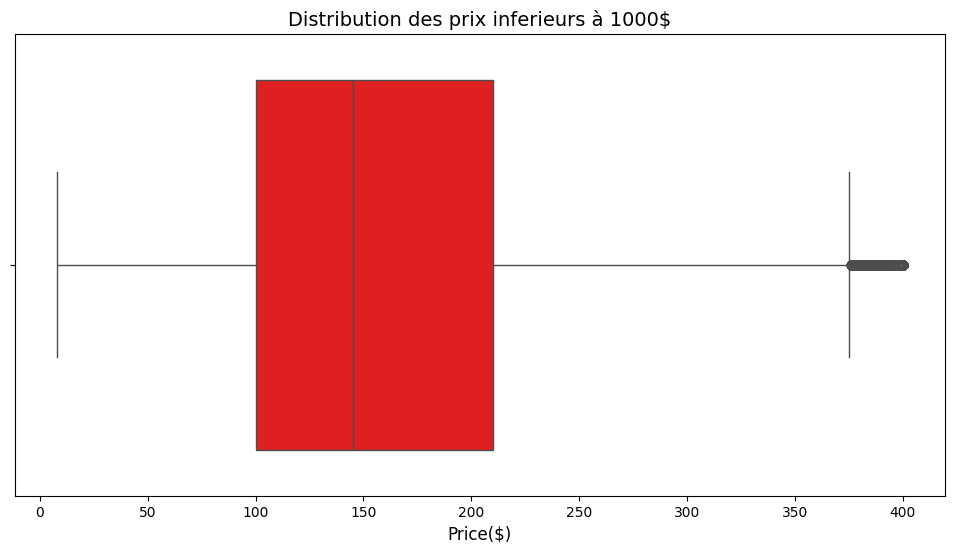

count    43891.000000
mean       165.228794
std         85.275130
min          8.000000
25%        100.000000
50%        145.000000
75%        210.000000
max        400.000000
Name: price, dtype: float64
Données après nettoyage :
count    42743.000000
mean       159.097653
std         77.641329
min          8.000000
25%        100.000000
50%        140.000000
75%        200.000000
max        375.000000
Name: price, dtype: float64


In [77]:
#TODO - Visualize Price Distribution below 1000$ with seaborn boxplot and describe
import seaborn as sns
import matplotlib.pyplot as plt

#print(cleaned_listing_data['price'])

# Conversion en chaîne (puisqu'à la base le type était object)
#Supprimer le symbole '$' et convertir la colonne en numérique
cleaned_listing_data.loc[:,'price'] = cleaned_listing_data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
print(cleaned_listing_data['price'])
#calculer la valeur moyenne des colonnes en ignorant les NaN
mean_price = cleaned_listing_data['price'].mean()
#print(mean_price)

#remplaçant les NaN par la moyenne
cleaned_listing_data.loc[:,'price'].fillna(mean_price)
print('les données aprés remplaçement des valeurs NaN:\n' ,cleaned_listing_data['price'].head(10))

#filtrer les prix qui sont inferieurs à 1000$
price_below_1000 = cleaned_listing_data[cleaned_listing_data['price'] < 1000]
print('prix en dessous de 1000 \n',price_below_1000['price'])


#visualize avec seaborn boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=price_below_1000,x='price', color='red')
plt.title('Distribution des prix inferieurs à 1000$',fontsize=14)
plt.xlabel('Price($)',fontsize=12)
plt.show()

#description de la distribution
print(price_below_1000['price'].describe())


# D'après le boxplot affiché, il existe des valeurs aberrantes dans les données.
# Ces valeurs aberrantes sont représentées par les points dispersés à droite du graphique

#suppression des valeurs aberrantes
# calcul des limites pour les valeurs aberrantes

Q1 = price_below_1000['price'].quantile(0.25) # La valeur en dessous de laquelle se trouve 25 % des données.Le premier quartile marque la limite inférieure de la boîte dans un boxplot.
#Q2 La valeur qui divise les données en deux parties égales,
#  c'est-à-dire où 50 % des données sont inférieures et 50 % sont supérieures.c'est la médiane cad ligne centrale de la boite dans un boxplot
Q3 = price_below_1000['price'].quantile(0.75) #La valeur en dessous de laquelle se trouve 75 % des données.Le troisième quartile marque la limite supérieure de la boîte dans un boxplot.
IQR = Q3 - Q1 #L'IQR mesure la dispersion des 50 % centraux des données et est utilisé pour détecter les valeurs aberrantes.
#Les valeurs inférieures à Q1 - 1.5 * IQR ou ou supérieures à Q3 + 1.5 * IQR sont considérées comme des outliers.
limit_inf = Q1 - 1.5 * IQR  # Limite inférieure 
limit_sup = Q3 + 1.5 * IQR  # Limite supérieure pour les valeurs aberrantes

cleaned_listing_data = price_below_1000[(price_below_1000['price'] >= limit_inf) & (price_below_1000['price'] <= limit_sup)]
print("Données après nettoyage :")
print(cleaned_listing_data['price'].describe())


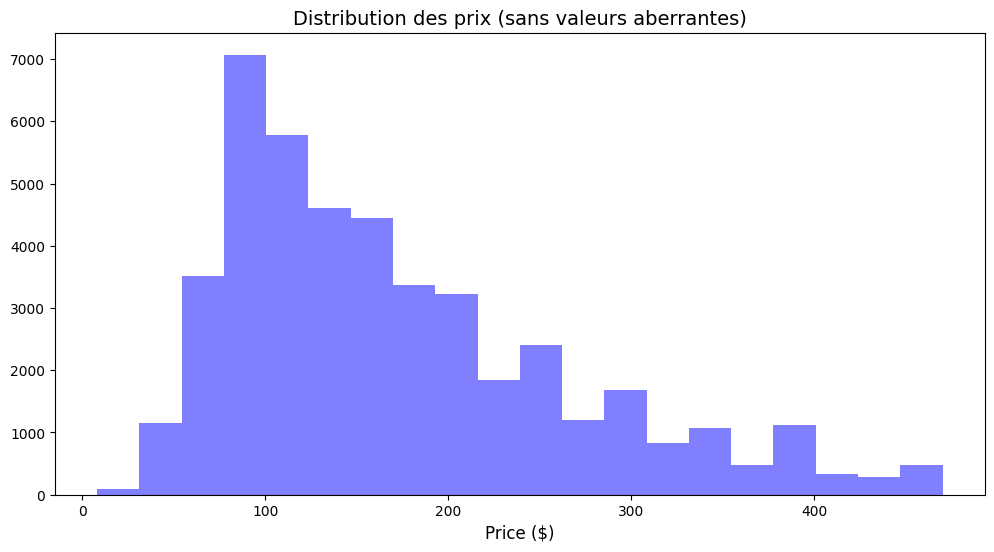

In [65]:
from matplotlib import pyplot as plt 
import seaborn as sns
# Visualisation de la distribution nettoyée avec un histogramme
plt.figure(figsize=(12, 6))
plt.hist(cleaned_listing_data['price'], bins=20, facecolor='blue', alpha=0.5)  # bins=30 permet de definir le nombre d'intervalles
plt.title('Distribution des prix (sans valeurs aberrantes)', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.show()

C:\Users\fatym\AppData\Local\Temp\ipykernel_13948\50723533.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_listing_data['price'], bins=20, kde=True, color='green')  # kde=True ajoute une courbe de densité


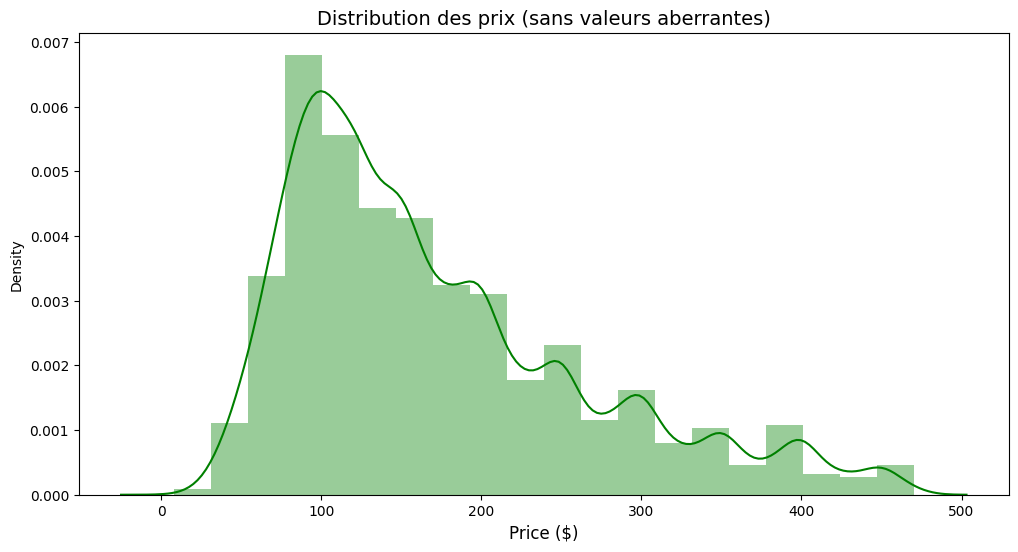

In [66]:
#TODO - Visualize Price distribution with distplot

import seaborn as sns
import matplotlib.pyplot as plt

# Visualisation avec distplot 
plt.figure(figsize=(12, 6))
sns.distplot(cleaned_listing_data['price'], bins=20, kde=True, color='green')  # kde=True ajoute une courbe de densité
plt.title('Distribution des prix (sans valeurs aberrantes)', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.show()


**Q4**. Let's try to get a better understanding of price variation by visualizing geographically our data:
- Visualize the listings categorized as "Entire Home/apt" on a map.

> 🔦 **Hint**: No need for complex functions, `sns.scatterplot` should work perfectly!

- Visualize this same map with varying color depending on the price
- Make sure the column `neighbourhood_cleansed` is cleaned by observing the data points with varying color depending on the neighbourhood

0        Entire home/apt
1        Entire home/apt
2        Entire home/apt
4        Entire home/apt
8        Entire home/apt
              ...       
95451    Entire home/apt
95452    Entire home/apt
95453    Entire home/apt
95455    Entire home/apt
95459    Entire home/apt
Name: room_type, Length: 40646, dtype: object 

0


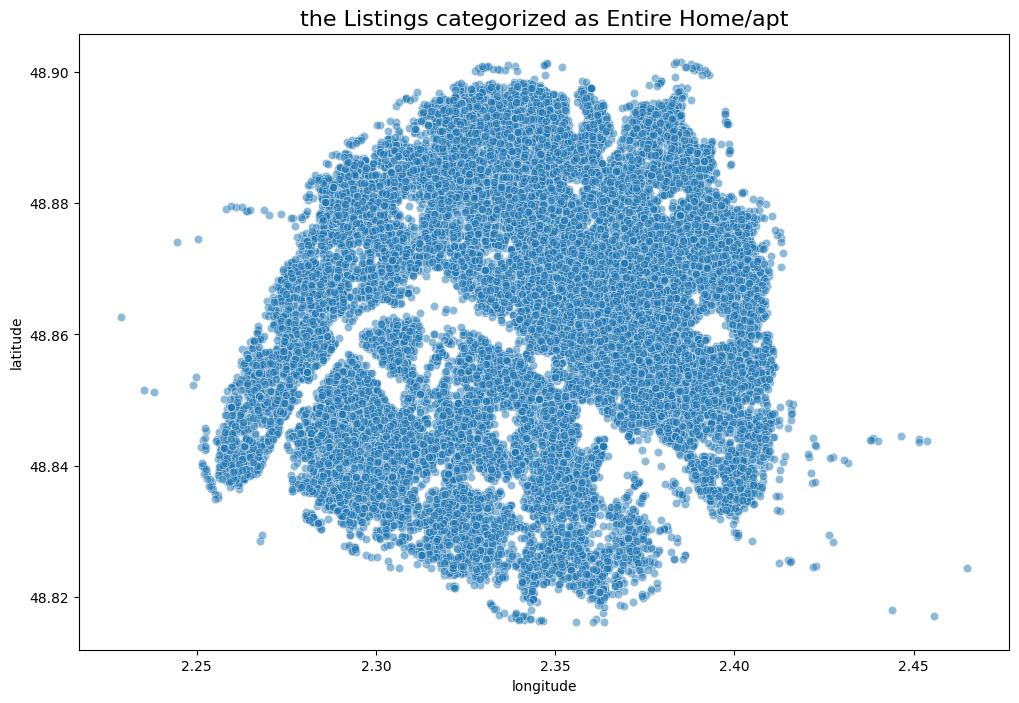

In [67]:
#TODO - Geo Visualization with seaborn scatterplot

import seaborn as sns
import matplotlib.pyplot as plt

#cleaned_listing_data['room_type']
# Filtrer les données pour "Entire home/apt"
entire_home_data = cleaned_listing_data[cleaned_listing_data['room_type'] == 'Entire home/apt']
print(entire_home_data['room_type'],'\n')
print(cleaned_listing_data['room_type'].isna().sum())
#visualisation avec scatterplot 
plt.figure(figsize=(12, 8))
sns.scatterplot(data=entire_home_data, x='longitude', y='latitude', alpha=0.5)
plt.title('the Listings categorized as Entire Home/apt', fontsize=16)
plt.show()

In [78]:
#scinder le prix en trois categories
price_interval=[cleaned_listing_data['price'].min(),cleaned_listing_data['price'].quantile(0.25),cleaned_listing_data['price'].quantile(0.75),cleaned_listing_data['price'].max()]
labels=['Bas','Moyen','Elevé']
cleaned_listing_data.loc[:,"price_category"] = pd.cut(cleaned_listing_data.loc[:,"price"],bins=price_interval,labels=labels,include_lowest=True)
print(cleaned_listing_data['price_category'])

0        Moyen
1          Bas
2        Moyen
8          Bas
9        Elevé
         ...  
95453    Moyen
95454    Moyen
95455      Bas
95458      Bas
95459      Bas
Name: price_category, Length: 42743, dtype: category
Categories (3, object): ['Bas' < 'Moyen' < 'Elevé']


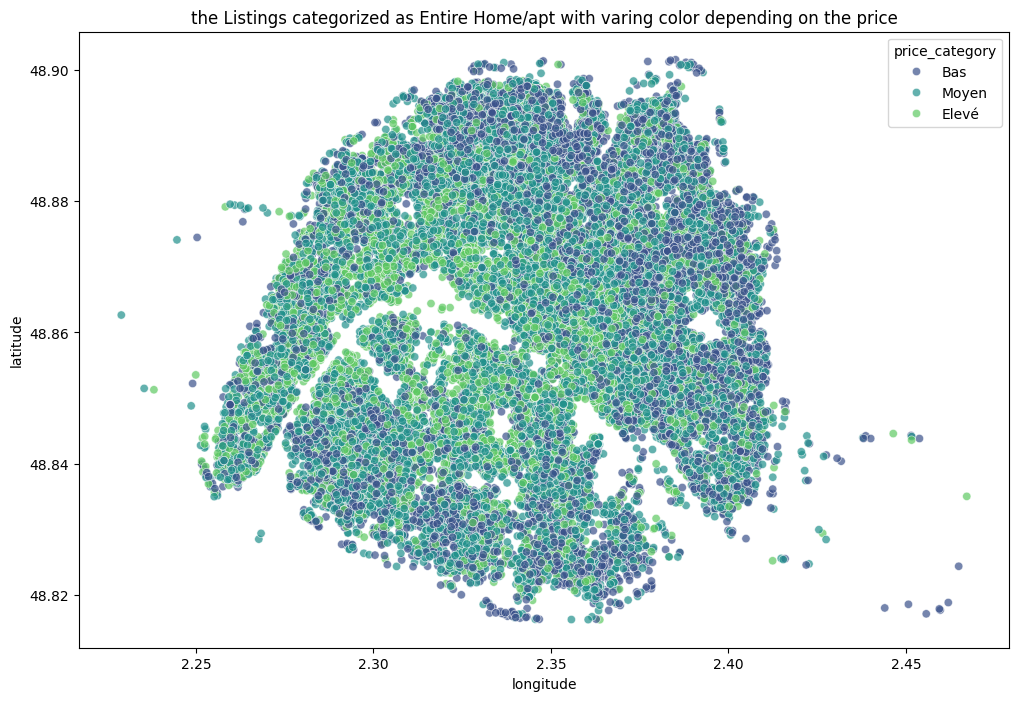

In [69]:
#TODO - Geo Visualization add color for prices (3 categories)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_listing_data,x='longitude',y='latitude',hue='price_category',  palette='viridis',alpha=0.7)
plt.title('the Listings categorized as Entire Home/apt with varing color depending on the price')
plt.show()


In [70]:
print(cleaned_listing_data[ 'price'].head(10))

0     113.0
1      95.0
2     145.0
4     450.0
8      75.0
9     246.0
10     80.0
11     75.0
13     80.0
14    124.0
Name: price, dtype: object


0       Observatoire
1     Hôtel-de-Ville
2     Hôtel-de-Ville
4    Buttes-Chaumont
8             Louvre
Name: neighbourhood_cleansed, dtype: object
neighbourhood with NaN 0


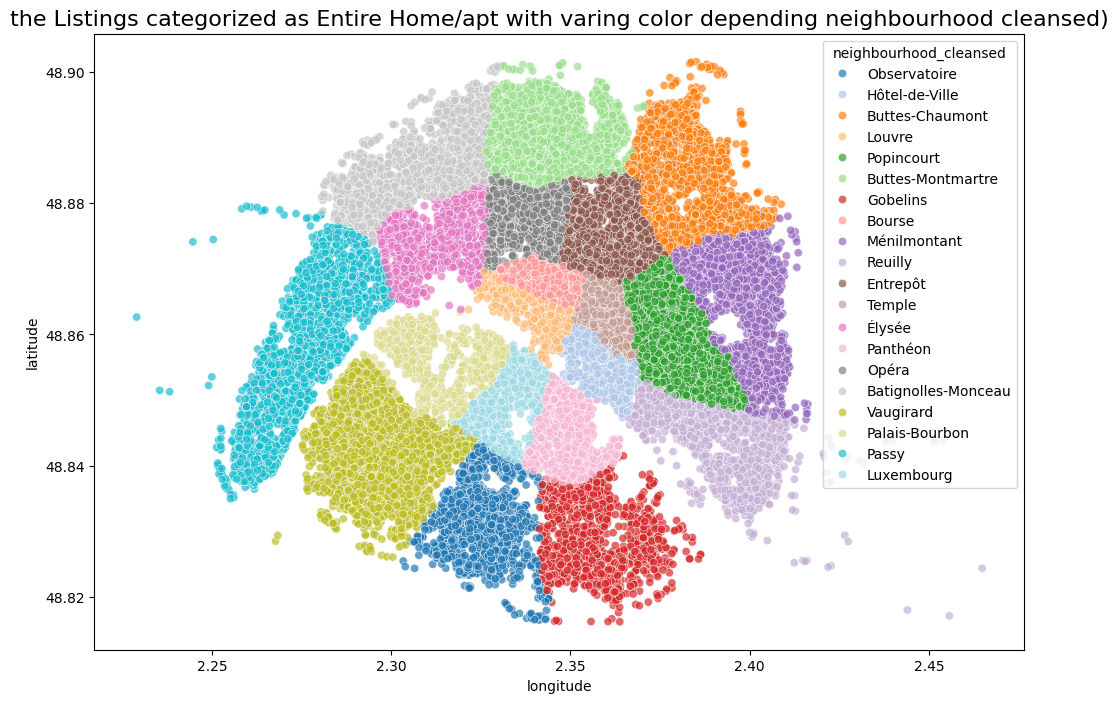

In [71]:
#TODO - Geo Visualization for neighbourhood_cleansed
print(cleaned_listing_data['neighbourhood_cleansed'].head())
print('neighbourhood with NaN',cleaned_listing_data['neighbourhood_cleansed'].isna().sum())

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=entire_home_data,
    x='longitude',
    y='latitude',
    hue='neighbourhood_cleansed',  # La couleur dépend du quartier
    palette='tab20',  # Palette de couleurs distinctes
    alpha=0.7
)
plt.title('the Listings categorized as Entire Home/apt with varing color depending neighbourhood cleansed)', fontsize=16)
plt.show()

**Q5**. Compute **median price depending on the neighbourhood**. Which districts appear the most and the less expensive?

Draw a nice visualization of these prices discrepancies (differences).

In [72]:
#TODO - Price per district
#print(cleaned_listing_data['neighbourhood'])
#calcul de la median des prix par quartier
median_price_neighbourhood =cleaned_listing_data.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False)
print(median_price_neighbourhood)


neighbourhood_cleansed
Élysée                 200.0
Louvre                 200.0
Luxembourg             191.5
Palais-Bourbon         190.0
Hôtel-de-Ville         184.0
Temple                 178.0
Bourse                 172.0
Passy                  170.0
Panthéon               168.0
Opéra                  166.0
Vaugirard              149.0
Batignolles-Monceau    143.0
Entrepôt               142.0
Popincourt             135.0
Observatoire           130.0
Reuilly                125.0
Buttes-Montmartre      125.0
Gobelins               120.0
Buttes-Chaumont        119.0
Ménilmontant           110.0
Name: price, dtype: object


In [73]:
#TODO - Give the cheapest and most expensive neighbourhood
#le quartier avec le prix median le plus elevé
most_expensive_neighbourhood=median_price_neighbourhood[median_price_neighbourhood == median_price_neighbourhood.max()]
print('le quartier avec le prix median le plus elevé :',most_expensive_neighbourhood)

#le quartier avec le prix median le moins elevé
less_expensive_neighbourhood=median_price_neighbourhood[median_price_neighbourhood == median_price_neighbourhood.min()]
print('\n le quartier avec le prix median le moins elevé :',less_expensive_neighbourhood)

le quartier avec le prix median le plus elevé : neighbourhood_cleansed
Élysée    200.0
Louvre    200.0
Name: price, dtype: object

 le quartier avec le prix median le moins elevé : neighbourhood_cleansed
Ménilmontant    110.0
Name: price, dtype: object


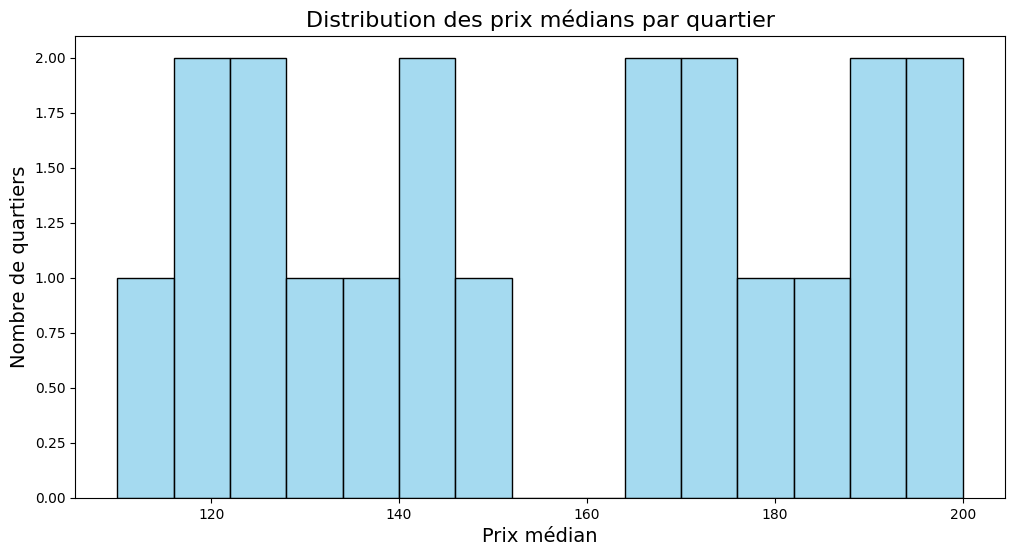

In [74]:
#TODO - Visualize median_price_per_district with an histogram

plt.figure(figsize=(12, 6))
sns.histplot(median_price_neighbourhood, kde=False, bins=15, color='skyblue')
plt.title('Distribution des prix médians par quartier', fontsize=16)
plt.xlabel('Prix médian', fontsize=14)
plt.ylabel('Nombre de quartiers', fontsize=14)
plt.show()

**Q6**. Play with the dataset and draw nice and impactful visualizations!

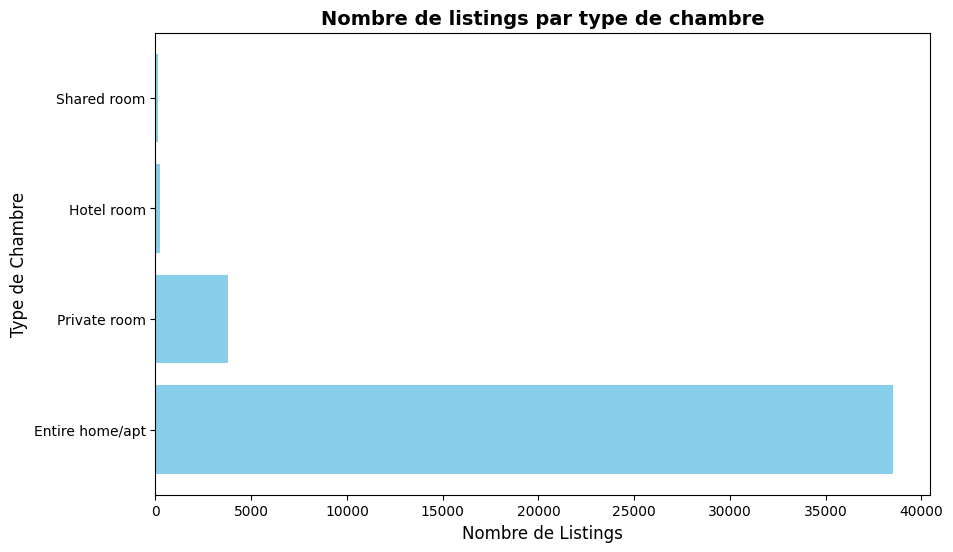

In [80]:
#TODO - More dataviz!
### STRIP_START
# You can have a look a these resources for inspiration:
#    - https://docs.google.com/presentation/d/1dShCpHl9UuVHzVdXqi681p0b0J8rCQKT6qhkjXF5H_8
#    - https://medium.com/datadriveninvestor/exploratory-data-analysis-on-airbnb-properties-in-paris-bce61bd680c8
### STRIP_END


# Calculer le nombre de listings par type de chambre
room_type_counts = cleaned_listing_data['room_type'].value_counts()

# visualiser avec un graphique à barres horizontales
plt.figure(figsize=(10, 6))
plt.barh(y=room_type_counts.index, width=room_type_counts.values, color='skyblue')

plt.title("Nombre de listings par type de chambre", fontsize=14, fontweight='bold')
plt.xlabel("Nombre de Listings", fontsize=12)
plt.ylabel("Type de Chambre", fontsize=12)

plt.show()

